In [21]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Here we extract the DR14 mass catalog from https://sites.utu.fi/sdssdr14/.  These are virial black hole mass estimates.  The data is packaged in a .fits file easily extracted with astropy.

In [2]:
# insert proper path
# catalog downloaded from 
FILE_PATH = '/Users/SnehPandya/Desktop/DeepLearningAGN/data/dr14q_spec_prop_ext.fits'
dr14 = fits.open(FILE_PATH)

In [3]:
DATA = dr14[1].data

In [4]:
# extract relevant data
SDSS_ID = DATA.field('SDSS_ID') # identification
RA = DATA.field('RA') # radial ascension (RA) coordinate  
DEC = DATA.field('DEC')# declination (DEC) coordinate
MASS = DATA.field('LOG_MBH') # virial SMBH mass estimate (LOG)
ERR = DATA.field('LOG_MBH_ERR') # error for mass (LOG)
Z = DATA.field('REDSHIFT') # AGN redshift
MI = DATA.field('MI') # K-corrected i-band magnitude

In [9]:
# make dataframe
df = pd.DataFrame(SDSS_ID, columns=['SDSS_ID'])
df['ID'] = SDSS_ID
df['ra'] = RA
df['dec'] = DEC
df['Mass'] = MASS
df['z'] = Z
df['ERR'] = ERR
df['M_i'] = MI
df.apply(pd.to_numeric, errors='ignore')
df.shape

(526265, 8)

In [13]:
df.describe()

,ra,dec,Mass,z,ERR,M_i
count,525103.000000,525103.000000,525103.000000,525103.000000,525103.000000,525103.000000
mean,166.427617,27.122435,8.638215,1.832548,0.559664,-25.045132
std,92.342673,19.660401,0.566146,0.783500,12.007540,24.007897
min,0.001898,-17.520444,1.088634,0.038000,0.000566,-47.771412
25%,128.438190,9.826806,8.305918,1.212138,0.076625,-25.996398
50%,170.593870,26.267388,8.683637,1.833200,0.141916,-25.091545
75%,215.957650,44.346698,9.017660,2.386000,0.262515,-24.166579
max,359.999940,84.431417,11.458900,5.470000,529.627482,9999.000000


Some of these black hole masses have very high errors or unphysical mass estimations.  Large uncertainites in the ground truth is not good for training, so here we filter mass estimates with large errors.

In [14]:
# drop unphysical estimates or NaN
df = df.dropna()
df = df.drop(df[df.Mass <= 0].index)

In [15]:
clean_df = df[df['ERR']<.3] # filter BH mass estimates with error < .3 dex
clean_df.shape

(417618, 8)

You can see we lost roughly ~100,000 AGN through our cleaning process. Now to visualize our data.  This plot shows the location on the sky of the observed AGN.

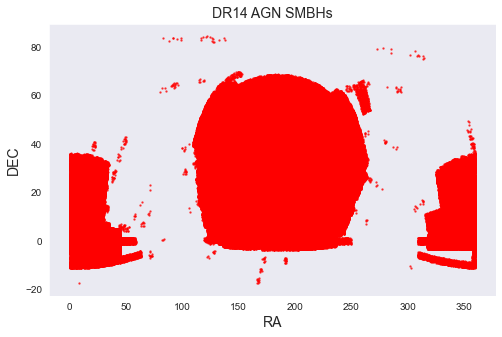

In [52]:
sns.set_style('dark')
plt.figure(figsize = [8,5])
plt.title('DR14 AGN SMBHs',fontsize=14)
plt.xlabel('RA',fontsize=14)
plt.ylabel('DEC',fontsize=14)
plt.scatter(clean_df['ra'], clean_df['dec'], color = 'red', s=2, alpha=.6)

Now we'd like to know how our masses and errors are distributed.

Text(0, 0.5, 'Count')

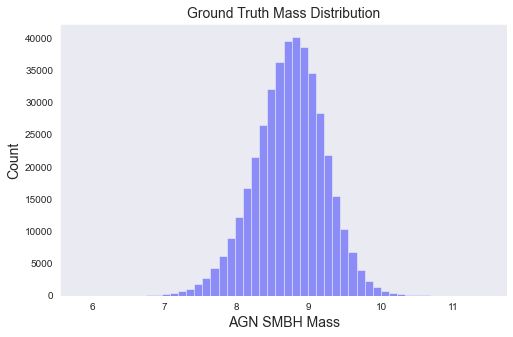

In [46]:
plt.figure(figsize=(8, 5))
sns.distplot(clean_df['Mass'], kde=False, color='blue')
plt.title('Ground Truth Mass Distribution',  fontsize=14)
# plt.xlim(0,.3)
plt.xlabel('AGN SMBH Mass',  fontsize=14)
plt.ylabel('Count',  fontsize=14)

Text(0, 0.5, 'Count')

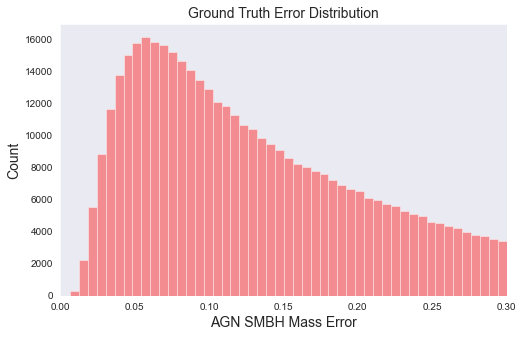

In [48]:
plt.figure(figsize=(8, 5))
sns.distplot(clean_df['ERR'], kde=False, color='red')
plt.title('Ground Truth Error Distribution',  fontsize=14)
plt.xlim(0,.3)
plt.xlabel('AGN SMBH Mass Error',  fontsize=14)
plt.ylabel('Count',  fontsize=14)

Now for our mass distribution as a function of redshift. The apparent break at z~2 is an artifict of survey design.

Text(0.5, 1.0, 'DR14 AGN')

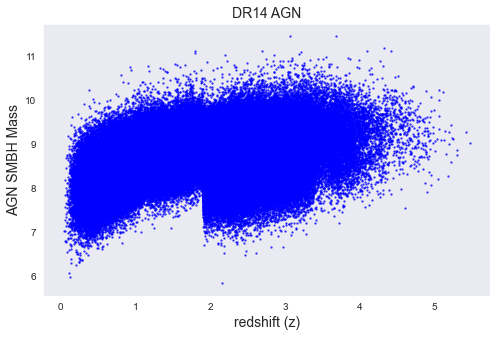

In [50]:
plt.figure(figsize=(8, 5))
plt.scatter(clean_df['z'],clean_df['Mass'], s=2, color = 'blue', alpha=.6)
plt.xlabel('redshift (z)', fontsize= 14)
plt.ylabel('AGN SMBH Mass', fontsize=14)
plt.title('DR14 AGN', fontsize=14)

This process can be repeated with the DR7 .fits file from (http://quasar.astro.illinois.edu/BH_mass/dr7.htm)

In [54]:
# output csv
clean_df.to_csv('../../data/dr14_BH.csv')